In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

At this stage of the project we work on exploring the data points and finding relevant parameters to train our model on.
We do this by plotting graphs across all parameters and trying to extract trends from it. We will employ matplotlib and pandas.


In [2]:
df = pd.read_csv(r"C:\Users\prana\OneDrive\Desktop\data.csv")
df.drop(columns = ["Unnamed: 0"],inplace = True) #drop unneeded column
print(df.tail(10))

           Area            Item  Year  hg/ha_yield  \
28232  Zimbabwe  Sweet potatoes  2012        22222   
28233  Zimbabwe           Wheat  2012        24420   
28234  Zimbabwe         Cassava  2013        46000   
28235  Zimbabwe           Maize  2013         7449   
28236  Zimbabwe        Potatoes  2013       165714   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
28232                            657            3375.53     20.52  
28233                            657            3375.53     20.52  
28234                            657            2550.07     19.76  
28235                            657            2550.07     19.76  
28236                            657            2550.07     19.76

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [4]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


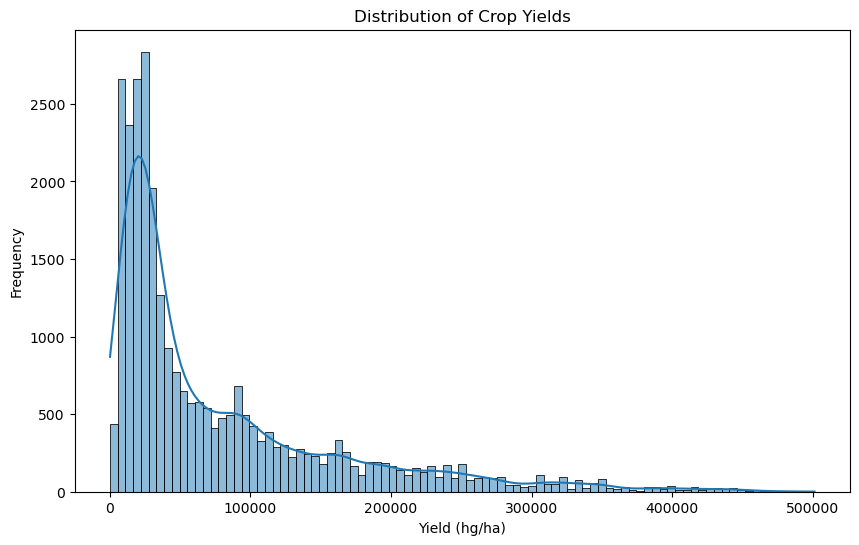

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hg/ha_yield'], kde=True)
plt.title('Distribution of Crop Yields')
plt.xlabel('Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()

This is the trend seen by the given data that the farmers aren't getting the best yeild and are not able to improve their crop prediction. Using our model they will be able to improve the crop yeild by growing the best crop for that suitable area, climate, rainfall and available pesticide resources.


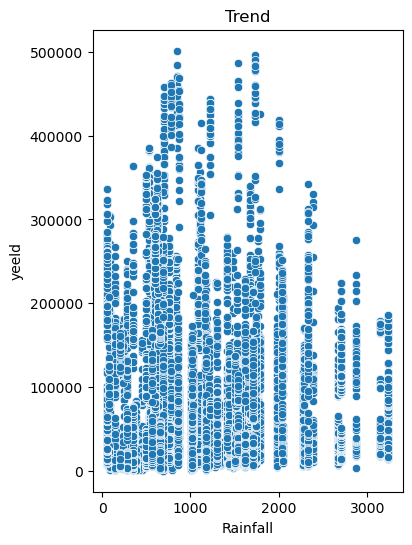

In [6]:
plt.figure(figsize=(4, 6))
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title('Trend')
plt.xlabel('Rainfall')
plt.ylabel('yeeld')
plt.show()

We plotted the avg rainfall against the hg/ha yield and concluded that the trend is parabolic.Too little and too much rain negatively affects the yield and there is a range of avg rainfall which is optimal.

C:\Users\prana\AppData\Local\Temp\ipykernel_18804\853117722.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='average_rain_fall_mm_per_year', ci=None)


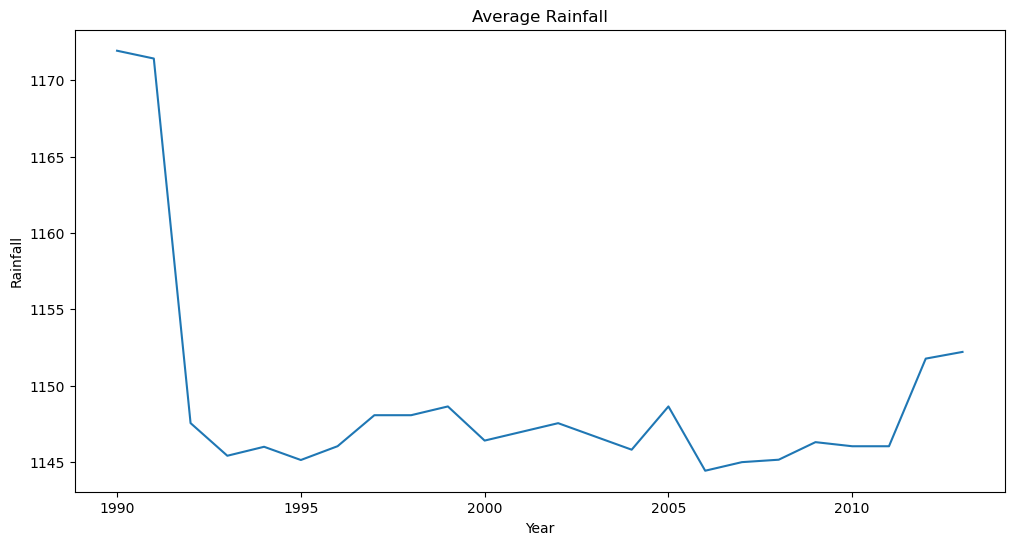

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='average_rain_fall_mm_per_year', ci=None)
plt.title('Average Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

Theres no relation ig


C:\Users\prana\AppData\Local\Temp\ipykernel_18804\2035746654.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='hg/ha_yield', ci=None)


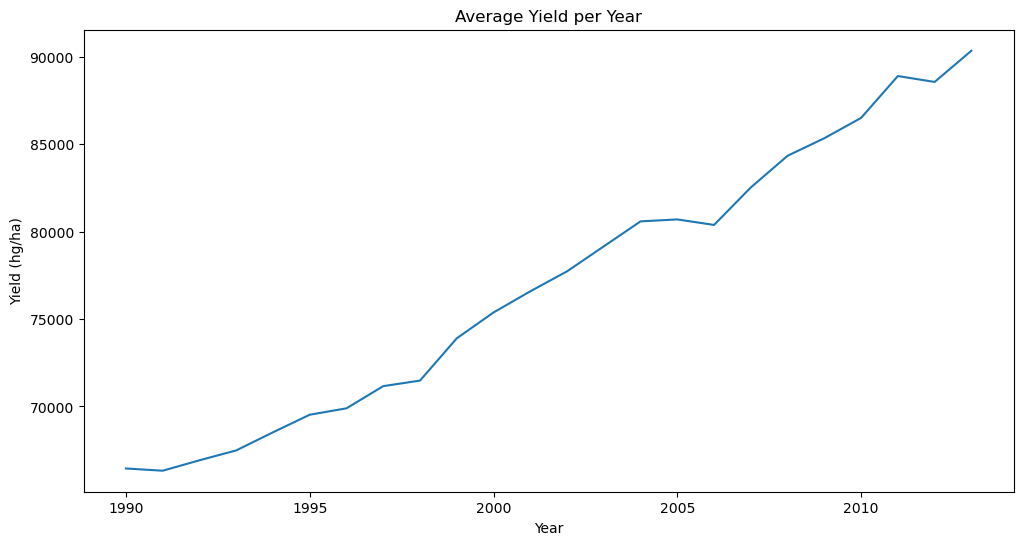

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='hg/ha_yield', ci=None)
plt.title('Average Yield per Year')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.show()

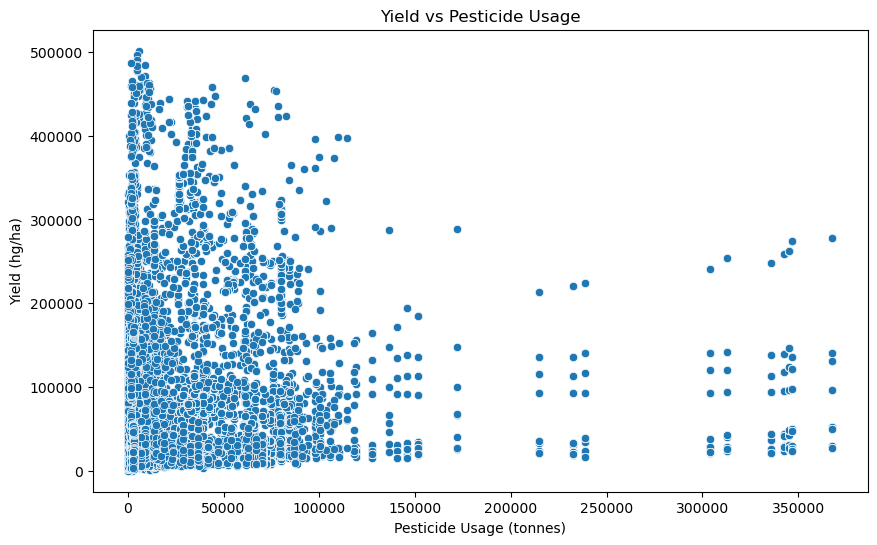

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Yield vs Pesticide Usage')
plt.xlabel('Pesticide Usage (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

we can observe that with the increase usage of pesticide decreases the amount of yield obtained which defeats the purpose of using pesticides 

In [10]:
filtered_rows = df[df['Item'].str.contains('maize',case=False,na=False)]

Filtering out datapoints for only maize crop so we can specifically target singular crops for a more accurate data analysis

In [11]:
print(filtered_rows)

           Area   Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0       Albania  Maize  1990        36613                           1485   
6       Albania  Maize  1991        29068                           1485   
12      Albania  Maize  1992        24876                           1485   
18      Albania  Maize  1993        24185                           1485   
23      Albania  Maize  1994        25848                           1485   
...         ...    ...   ...          ...                            ...   
28203  Zimbabwe  Maize  2009         4642                            657   
28211  Zimbabwe  Maize  2010         8751                            657   
28219  Zimbabwe  Maize  2011         6568                            657   
28227  Zimbabwe  Maize  2012         7912                            657   
28235  Zimbabwe  Maize  2013         7449                            657   

       pesticides_tonnes  avg_temp  
0                 121.00     16.37  
6            

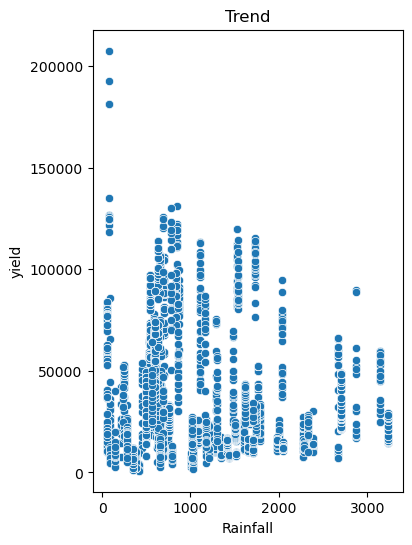

In [12]:
plt.figure(figsize=(4, 6))
sns.scatterplot(data=filtered_rows, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title('Trend')
plt.xlabel('Rainfall')
plt.ylabel('yield')
plt.show()

What we observe is that maize yield is maximised in areas with lower rainfall.

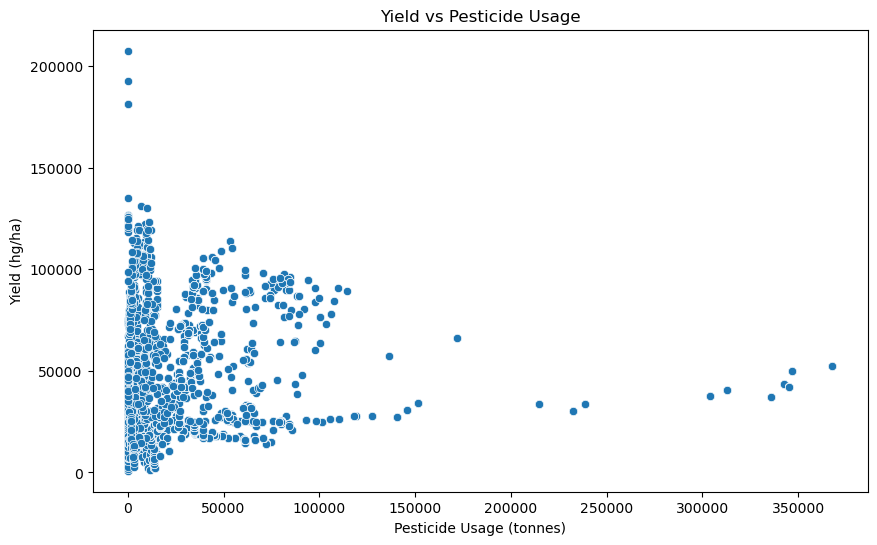

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_rows, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Yield vs Pesticide Usage')
plt.xlabel('Pesticide Usage (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

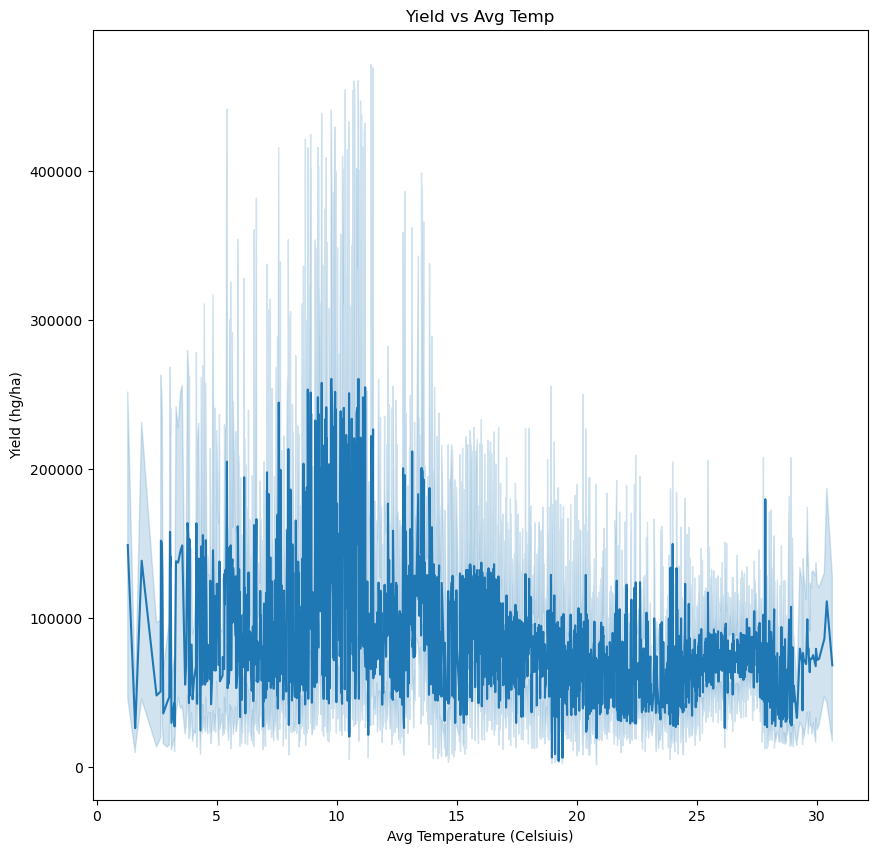

In [14]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df, x='avg_temp', y='hg/ha_yield')
plt.title('Yield vs Avg Temp')
plt.xlabel('Avg Temperature (Celsiuis)')
plt.ylabel('Yield (hg/ha)')
plt.show()

Avg Temp V Yield for entire dataset

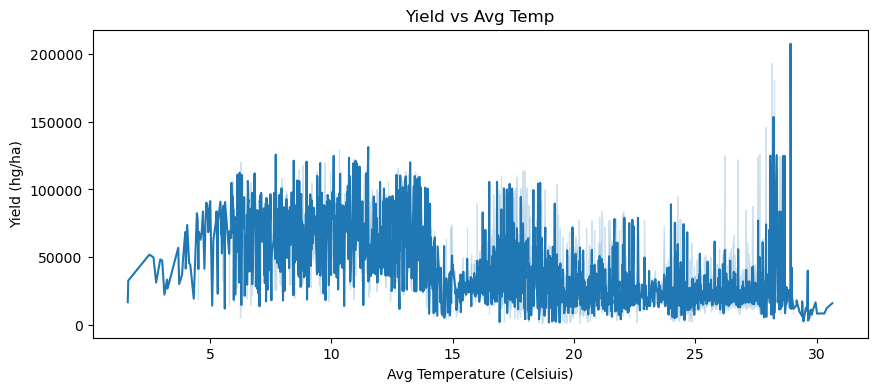

In [15]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=filtered_rows, x='avg_temp', y='hg/ha_yield')
plt.title('Yield vs Avg Temp')
plt.xlabel('Avg Temperature (Celsiuis)')
plt.ylabel('Yield (hg/ha)')
plt.show()

We can say that the ideal temperature for the maximum yield of maize is aproximetley 26-28 degree celsius.

In [16]:
rice = df[df['Item'].str.contains('Rice',case=False,na=False)]

In [17]:
print(rice)

           Area         Item  Year  hg/ha_yield  \
2       Albania  Rice, paddy  1990        23333   
8       Albania  Rice, paddy  1991        28538   
14      Albania  Rice, paddy  1992        40000   
20      Albania  Rice, paddy  1993        41786   
101     Algeria  Rice, paddy  1990        28000   
...         ...          ...   ...          ...   
28205  Zimbabwe  Rice, paddy  2009        22857   
28213  Zimbabwe  Rice, paddy  2010        22775   
28221  Zimbabwe  Rice, paddy  2011        22704   
28229  Zimbabwe  Rice, paddy  2012        22581   
28237  Zimbabwe  Rice, paddy  2013        22581   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
2                               1485             121.00     16.37  
8                               1485             121.00     15.36  
14                              1485             121.00     16.06  
20                              1485             121.00     16.05  
101                               89           

Now we will draw graphs for the same parameters for rice

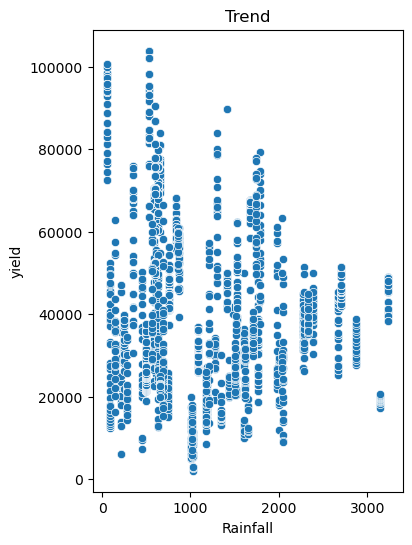

In [18]:
plt.figure(figsize=(4, 6))
sns.scatterplot(data=rice, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title('Trend')
plt.xlabel('Rainfall')
plt.ylabel('yield')
plt.show()

We can conclude that a avg rainfall of ab 300mm is ideal for cultivation of rice

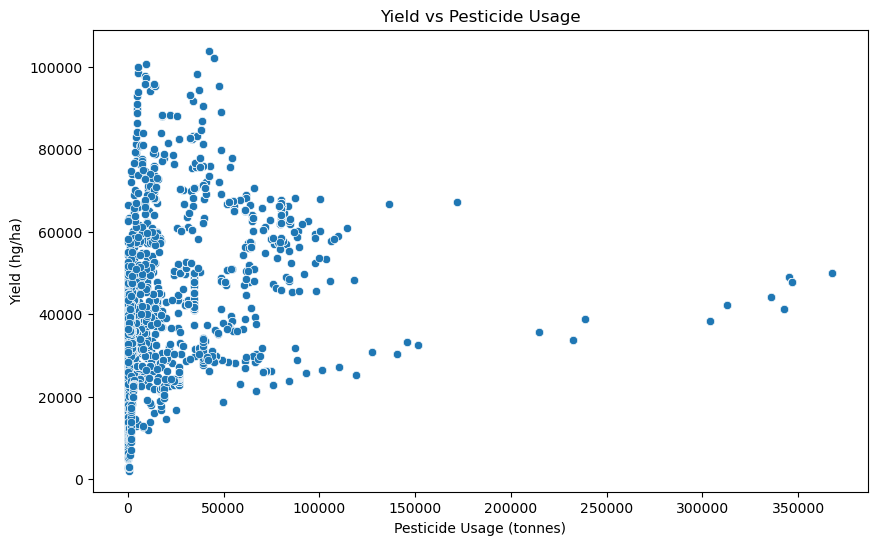

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rice, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Yield vs Pesticide Usage')
plt.xlabel('Pesticide Usage (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

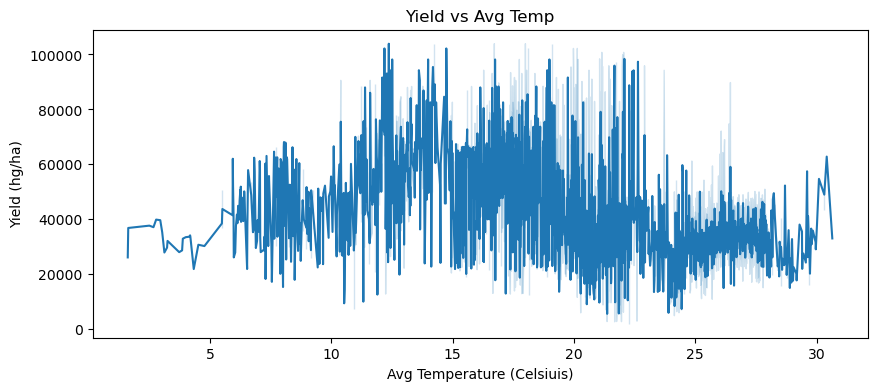

In [20]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=rice, x='avg_temp', y='hg/ha_yield')
plt.title('Yield vs Avg Temp')
plt.xlabel('Avg Temperature (Celsiuis)')
plt.ylabel('Yield (hg/ha)')
plt.show()

In [21]:
wheat = df[df['Item'].str.contains('Wheat',case=False,na=False)]

In [22]:
print(wheat)

           Area   Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
5       Albania  Wheat  1990        30197                           1485   
11      Albania  Wheat  1991        20698                           1485   
17      Albania  Wheat  1992        24388                           1485   
22      Albania  Wheat  1993        29976                           1485   
26      Albania  Wheat  1994        24745                           1485   
...         ...    ...   ...          ...                            ...   
28209  Zimbabwe  Wheat  2009        30000                            657   
28217  Zimbabwe  Wheat  2010        27681                            657   
28225  Zimbabwe  Wheat  2011        26274                            657   
28233  Zimbabwe  Wheat  2012        24420                            657   
28241  Zimbabwe  Wheat  2013        22888                            657   

       pesticides_tonnes  avg_temp  
5                 121.00     16.37  
11           

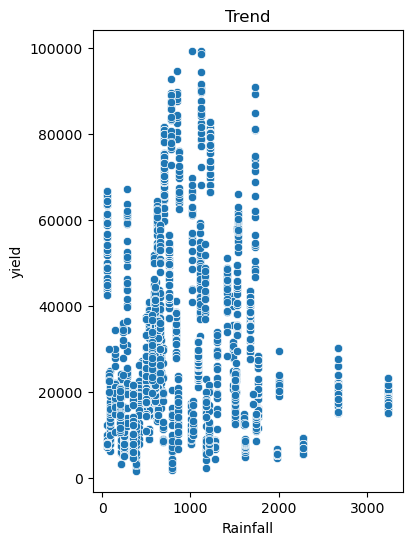

In [23]:
plt.figure(figsize=(4, 6))
sns.scatterplot(data=wheat, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title('Trend')
plt.xlabel('Rainfall')
plt.ylabel('yield')
plt.show()

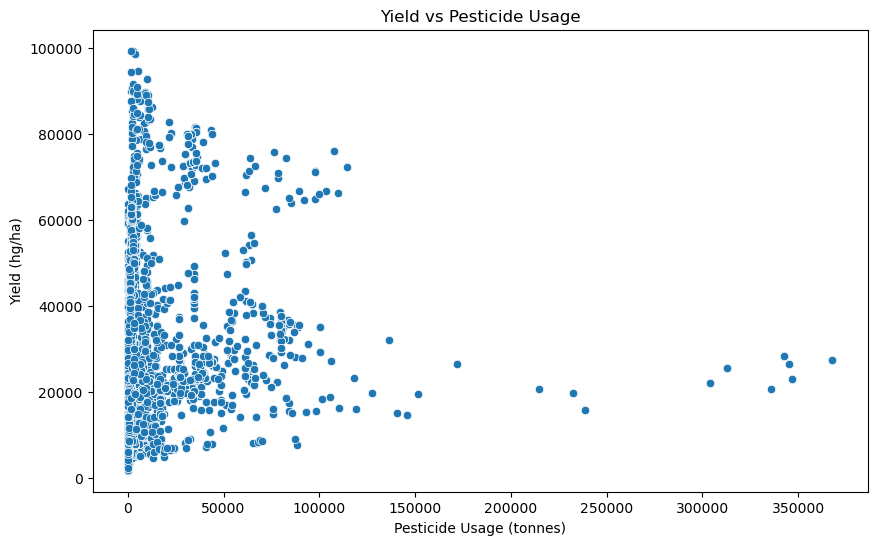

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wheat, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Yield vs Pesticide Usage')
plt.xlabel('Pesticide Usage (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

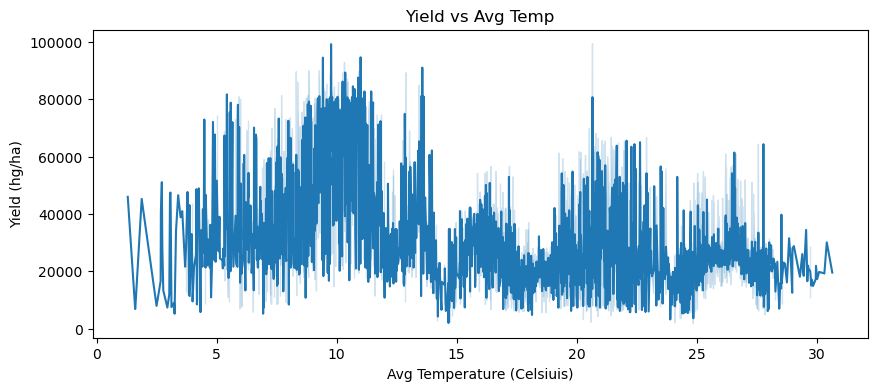

In [25]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=wheat, x='avg_temp', y='hg/ha_yield')
plt.title('Yield vs Avg Temp')
plt.xlabel('Avg Temperature (Celsiuis)')
plt.ylabel('Yield (hg/ha)')
plt.show()

In [26]:
potatoes = df[df['Item'].str.contains('Potatoes',case=False,na=False)]

In [27]:
print(potatoes)

           Area            Item  Year  hg/ha_yield  \
1       Albania        Potatoes  1990        66667   
7       Albania        Potatoes  1991        77818   
13      Albania        Potatoes  1992        82920   
19      Albania        Potatoes  1993        98446   
24      Albania        Potatoes  1994        81404   
...         ...             ...   ...          ...   
28224  Zimbabwe  Sweet potatoes  2011        21953   
28228  Zimbabwe        Potatoes  2012       171875   
28232  Zimbabwe  Sweet potatoes  2012        22222   
28236  Zimbabwe        Potatoes  2013       165714   
28240  Zimbabwe  Sweet potatoes  2013        22222   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
1                               1485             121.00     16.37  
7                               1485             121.00     15.36  
13                              1485             121.00     16.06  
19                              1485             121.00     16.05  
24         

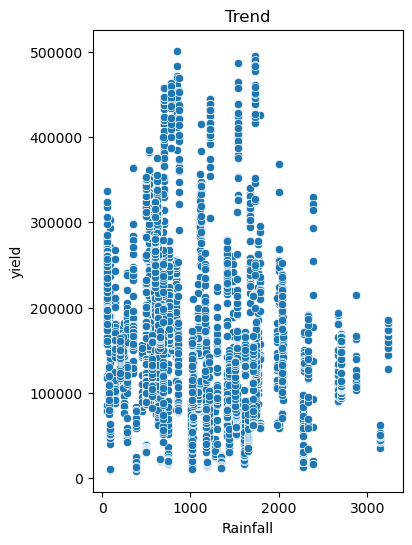

In [28]:
plt.figure(figsize=(4, 6))
sns.scatterplot(data=potatoes, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title('Trend')
plt.xlabel('Rainfall')
plt.ylabel('yield')
plt.show()

Hence we can say that potato grows well in areas of moderate rainfal of about 1000mm per annum

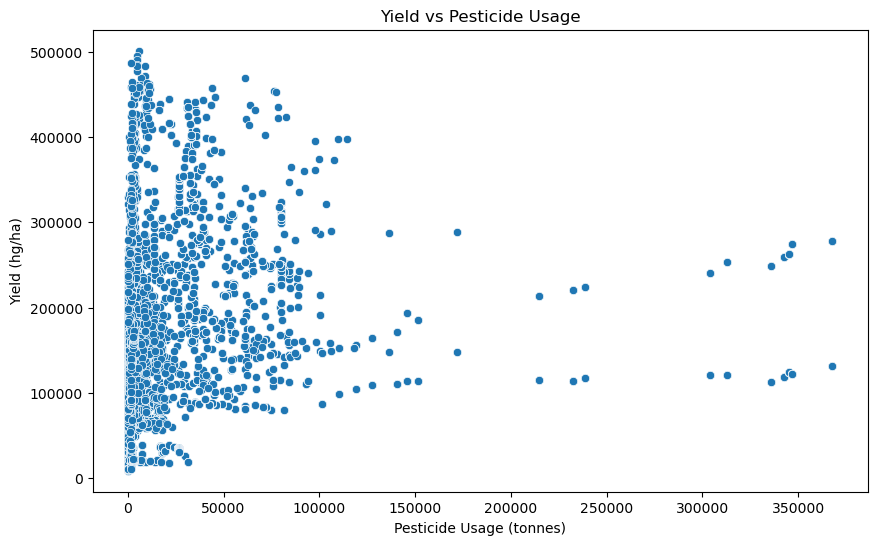

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=potatoes, x='pesticides_tonnes', y='hg/ha_yield')
plt.title('Yield vs Pesticide Usage')
plt.xlabel('Pesticide Usage (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

We can say that potoatoes grow well with minimum amount of pesticides added to it.

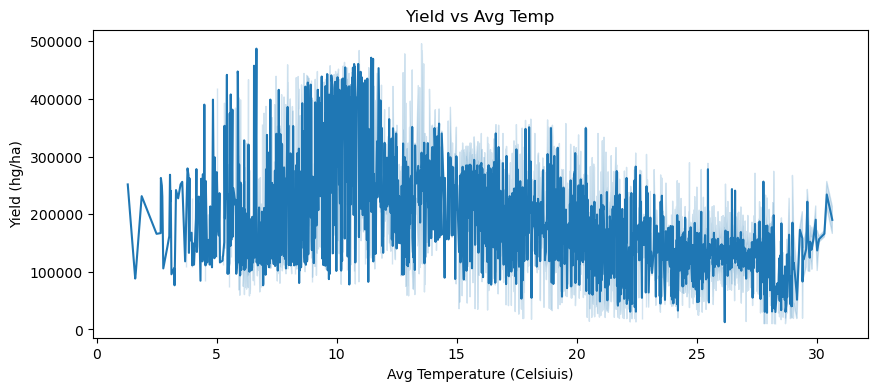

In [30]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=potatoes, x='avg_temp', y='hg/ha_yield')
plt.title('Yield vs Avg Temp')
plt.xlabel('Avg Temperature (Celsiuis)')
plt.ylabel('Yield (hg/ha)')
plt.show()

It is evident by our data exploration that crop yield is dependant on the factors avaialble in our dataset. Therefore it is feasable to create a classifier model using the parameters that will help us in predicting yields for new entries. We will try to employ the popular randomforest library to create this model.

In [31]:
x=df.drop(columns = ["hg/ha_yield"])
y= df["hg/ha_yield"]
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
one = OneHotEncoder(drop = 'first')
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('onehotencoder',one,[0,1]),
        ('standrization',scaler,[2,3,4,5])
    ],
    remainder='passthrough'
)
preprocessor




ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [0, 1]),
                                ('standrization', StandardScaler(),
                                 [2, 3, 4, 5])])

In [32]:
x_train_dummy= preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.fit_transform(x_test)
x_test_dummy

<5649x113 sparse matrix of type '<class 'numpy.float64'>'
	with 33438 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , GradientBoostingRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [34]:
model = {
    'Lr' : LinearRegression(),
    'Lss' : Lasso(),
    'Rid' : Ridge(solver='lsqr'),
    'knn' : KNeighborsRegressor(),
    'Dt' : DecisionTreeRegressor(),
    'Rf' : RandomForestRegressor(),
    'Br' : BaggingRegressor(),
    'GBR' : GradientBoostingRegressor()
}

What Is Mean Squared Error? The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss.

In [35]:
for name , mod in model.items():
    mod.fit(x_train_dummy , y_train)
    y_pred = mod.predict(x_test_dummy)
    print(f'{name} MSE : {mean_squared_error(y_test,y_pred)} Score : {r2_score(y_test,y_pred)}')

Lr MSE : 1795108406.5789623 Score : 0.7597211466875327
Lss MSE : 1795061795.60907 Score : 0.7597273856591493
Rid MSE : 1795876068.359285 Score : 0.7596183936216834
knn MSE : 102754057.97985484 Score : 0.9862461636667087
Dt MSE : 416262388.283413 Score : 0.9442824461367995
Rf MSE : 226064702.6310252 Score : 0.969740787061365
Br MSE : 237321755.47129583 Score : 0.9682340080065597
GBR MSE : 1803722692.6990361 Score : 0.7585681072479918


In [36]:
x = preprocessor.fit_transform(df.drop(columns=['hg/ha_yield']))

In [37]:
rf = RandomForestRegressor()
rf.fit(x_train_dummy,y_train)
rf.score(x_test_dummy,y_test)

0.9692097130287006

In [62]:
def prediction(Area,Item, Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
    feature = np.array([[Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
    feature = preprocessor.transform(feature)
    
    pred = rf.predict(feature).reshape(1,-1)
    return pred[0]

In [64]:
Year = 2000
average_rain_fall_mm_per_year = 59.0
pesticides_tonnes = 3024.11
avg_temp = 26.77
Area = 'Saudi Arabia'
Item = 'Sorghum'
result = prediction(Area, Item,Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp)
print("Your predicted yield will be",result)

Your predicted yield will be [13578.59]


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
